In [1]:
import pandas as pd

import seaborn as sns

import warnings 

import sklearn

In [2]:
warnings.filterwarnings('ignore')

# Unsupervised Learning
Pada algoritma unsupervised learning, data tidak memiliki label secara eksplisit dan model mampu belajar dari data dengan menemukan pola yang implisit. Sangat berbeda dengan supervised learning, unsupervised learning merupakan jenis learning yang hanya mempunyai variabel input tapi tidak mempunyai variabel output yang berhubungan. Tujuan dari Machine Learning ini adalah untuk memodelkan struktur data dan menyimpulkan fungsi yang mendeskripsikan data tersebut.

In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Subset & Scale Data

In [4]:
from sklearn.preprocessing import StandardScaler

df_subset = df[["sepal_length","petal_length"]]

ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)

# K - Means

In [5]:
from sklearn.cluster import KMeans

#Buat objek dari k means dengan jumlah cluster : 3
model = KMeans(n_clusters=3)

In [6]:
# Lakukan fit terhadap model
model.fit(x_scaled)
# Tentukan label untuk cluster
labels = model.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 2 2 1 0 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 2 2]


#### Buat cross_tab untuk mengbandingkan

In [7]:
# Buat dataframe dengan label dan spesies sebagai kolom
dfKmeans = pd.DataFrame({'labels': labels, 
                         'Species': df.species})
# buat crosstab: ct
ct1 = pd.crosstab(dfKmeans["labels"],
                 dfKmeans["Species"])
# Print ct
print(ct1)

Species  setosa  versicolor  virginica
labels                                
0             0           9         34
1            50           4          0
2             0          37         16


## Melihat Centroid yang telah dibuat

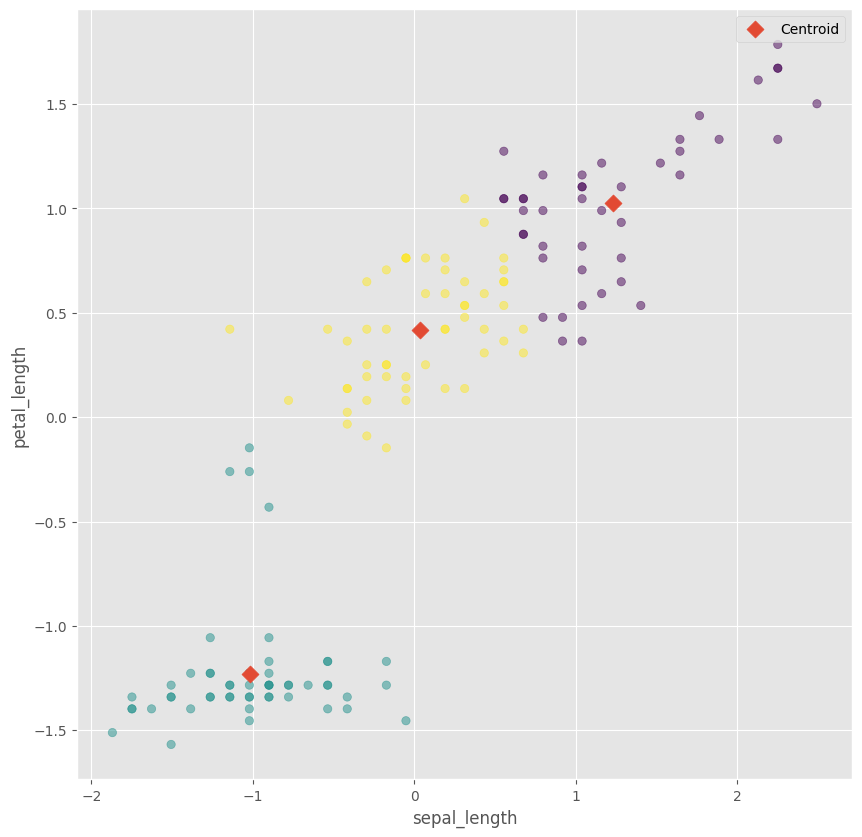

In [8]:
# import visualisasi
import matplotlib.pyplot as plt

#Gunakan 'style' ggplot
plt.style.use('ggplot')


# mengambil semua baris pada kolom tertentu (dalam bentuk array)
xs = x_scaled[:,0]
ys = x_scaled[:,1]

# Menampung koordinat dari tiap centroid
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# visualisasi cluster
plt.figure(figsize=(10,10))

#Data point
plt.scatter(xs,ys,
            alpha=0.5,c=labels)

#Centroid point
plt.scatter(centroids_x,centroids_y,
            marker="D",s=75,label="Centroid")

plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()
plt.show()

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))
fig.tight_layout(pad=5.0)

ax[0].scatter(centroids_x,centroids_y,
            marker="D",s=75,label="Centroid")
ax[0].scatter(xs,ys,
            alpha=0.5,c=labels)
ax[0].title.set_text("Clustering K-Means(K=3)")
ax[0].set_xlabel("sepal_length")
ax[0].set_ylabel("petal_length")
ax[0].legend()


dfAktual = df[["sepal_length","petal_length","species"]]
sns.scatterplot(x="sepal_length",y="petal_length",data=dfAktual,hue="species",s=75,ax=ax[1])
ax[1].title.set_text("Label Aktual")

plt.show()

## Menentukan Jumlah Cluster (Elbow Method)

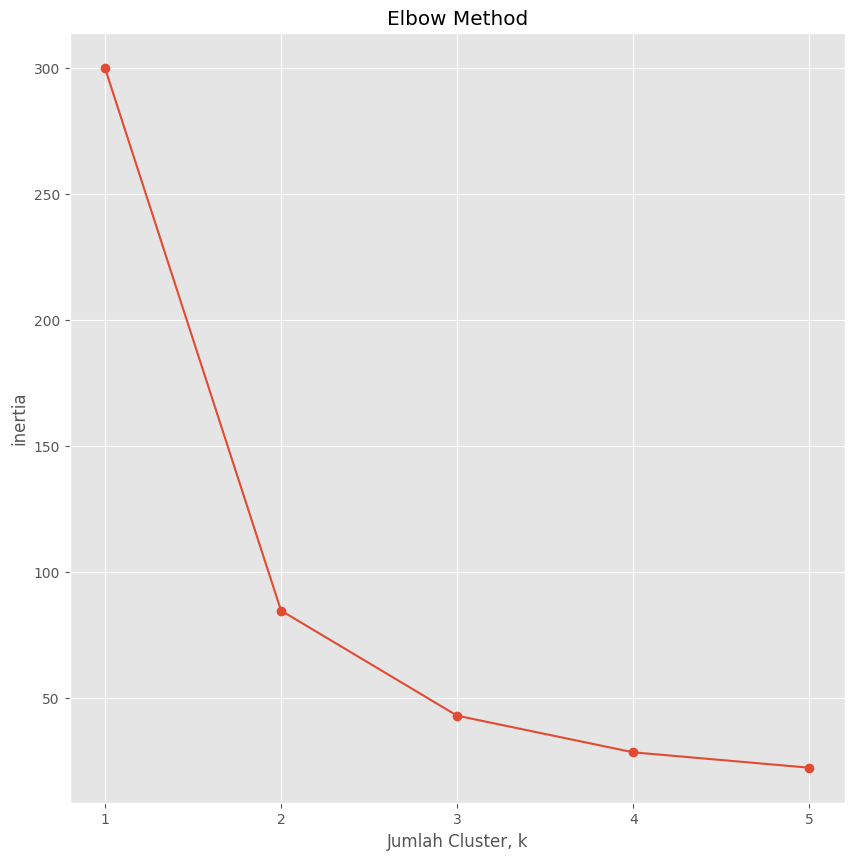

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,10))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('inertia')
plt.title("Elbow Method")
plt.xticks(ks)
plt.show()

- **Inertia** : *Inertia* mengukur seberapa baik sebuah datasat melakukan clustering. Sebuah model yang baik memiliki inertia yang rendah dan juga jumlah kluster yang rendah (K). Namun hal ini merupakan sebuah *tradeoff* karena bertambahnya jumlah K, *inertia* akan berkurang

# Hierarchical Clustering

### AgglomerativeClustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

#Buat objek dari AgglomerativeClustering dengan jumlah cluster : 3
hc_cluster = AgglomerativeClustering(n_clusters=3)

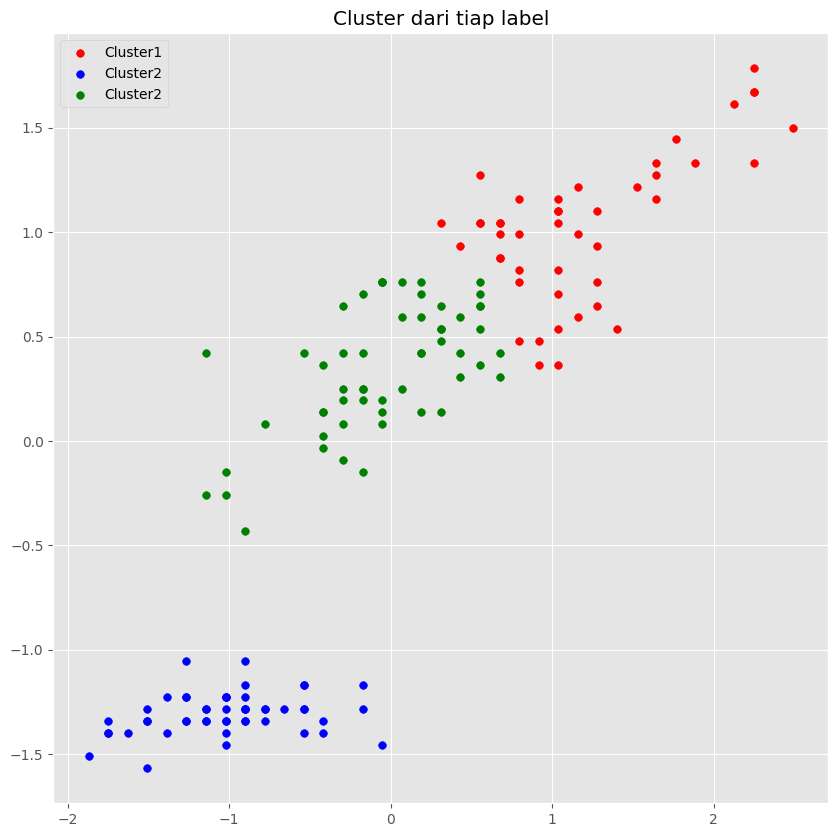

In [ ]:
aggClus = hc_cluster.fit_predict(x_scaled)

plt.figure(figsize=(10,10))
plt.scatter(x_scaled[aggClus==0, 0],
            x_scaled[aggClus==0, 1], s=30, c='red', label ='Cluster1')
plt.scatter(x_scaled[aggClus==1, 0],
            x_scaled[aggClus==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(x_scaled[aggClus==2, 0],
            x_scaled[aggClus==2, 1], s=30, c='green', label ='Cluster2')


plt.title("Cluster dari tiap label")
plt.legend()
plt.show()

### Dendrogram

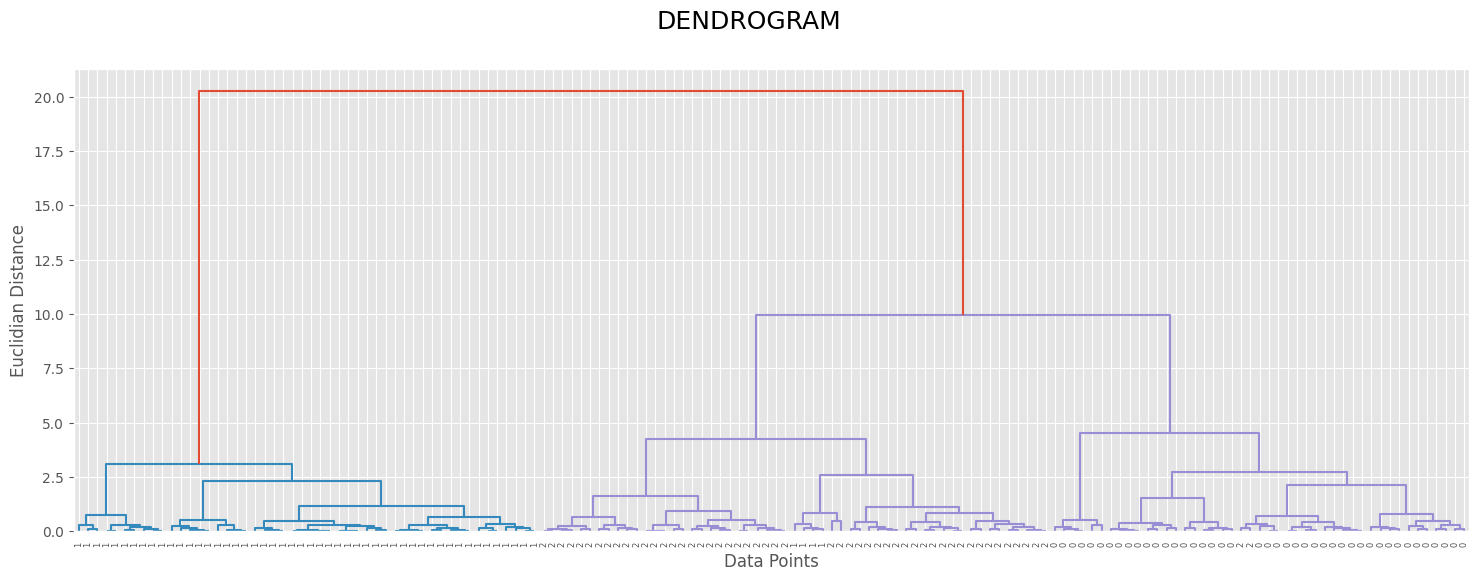

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

merg = linkage(x_scaled,method="ward")

plt.figure(figsize=(18,6))
dendrogram(merg, leaf_rotation=90,labels=labels,leaf_font_size=6)
plt.xlabel("Data Points")
plt.ylabel("Euclidian Distance")

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

## Ambil Label dari Cluster

In [ ]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(merg,5,criterion='distance')

In [ ]:
dfHierarical = pd.DataFrame({'labels': labels, 'Spesies': df.species})

ct2 = pd.crosstab(dfHierarical["labels"],dfHierarical["Spesies"])

# Display ct
print(ct2)

Spesies  setosa  versicolor  virginica
labels                                
1            50           0          0
2             0          41         14
3             0           9         36


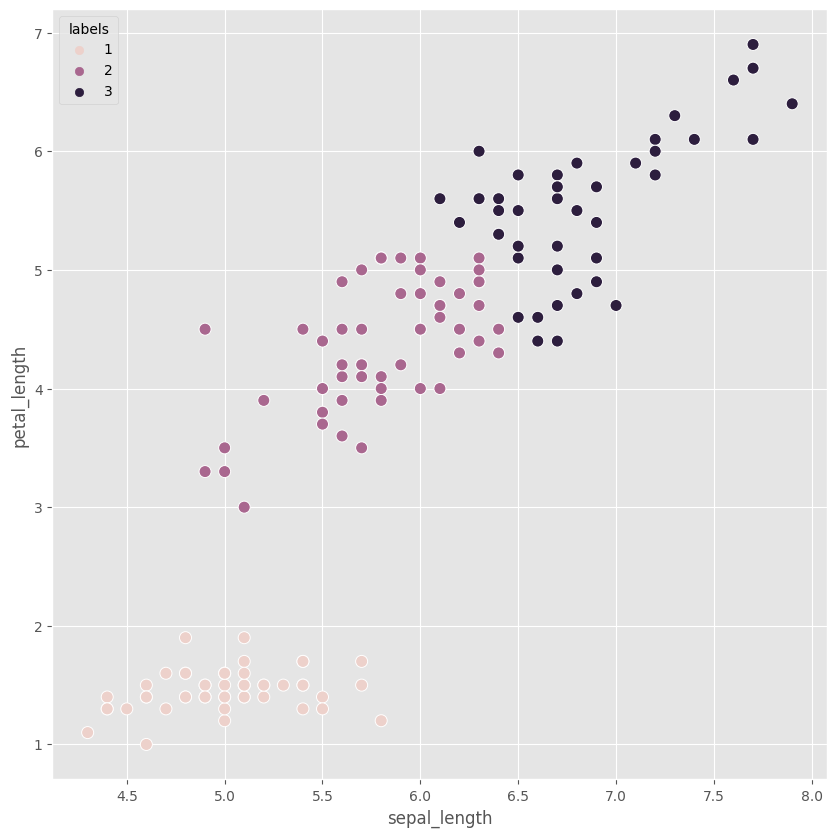

In [ ]:
#Buat kolom baru
df_subset['labels'] = labels

plt.figure(figsize=(10,10))

sns.scatterplot(x='sepal_length', y='petal_length', 
                hue='labels', data = df_subset,s=75)
plt.show()

## Evaluasi

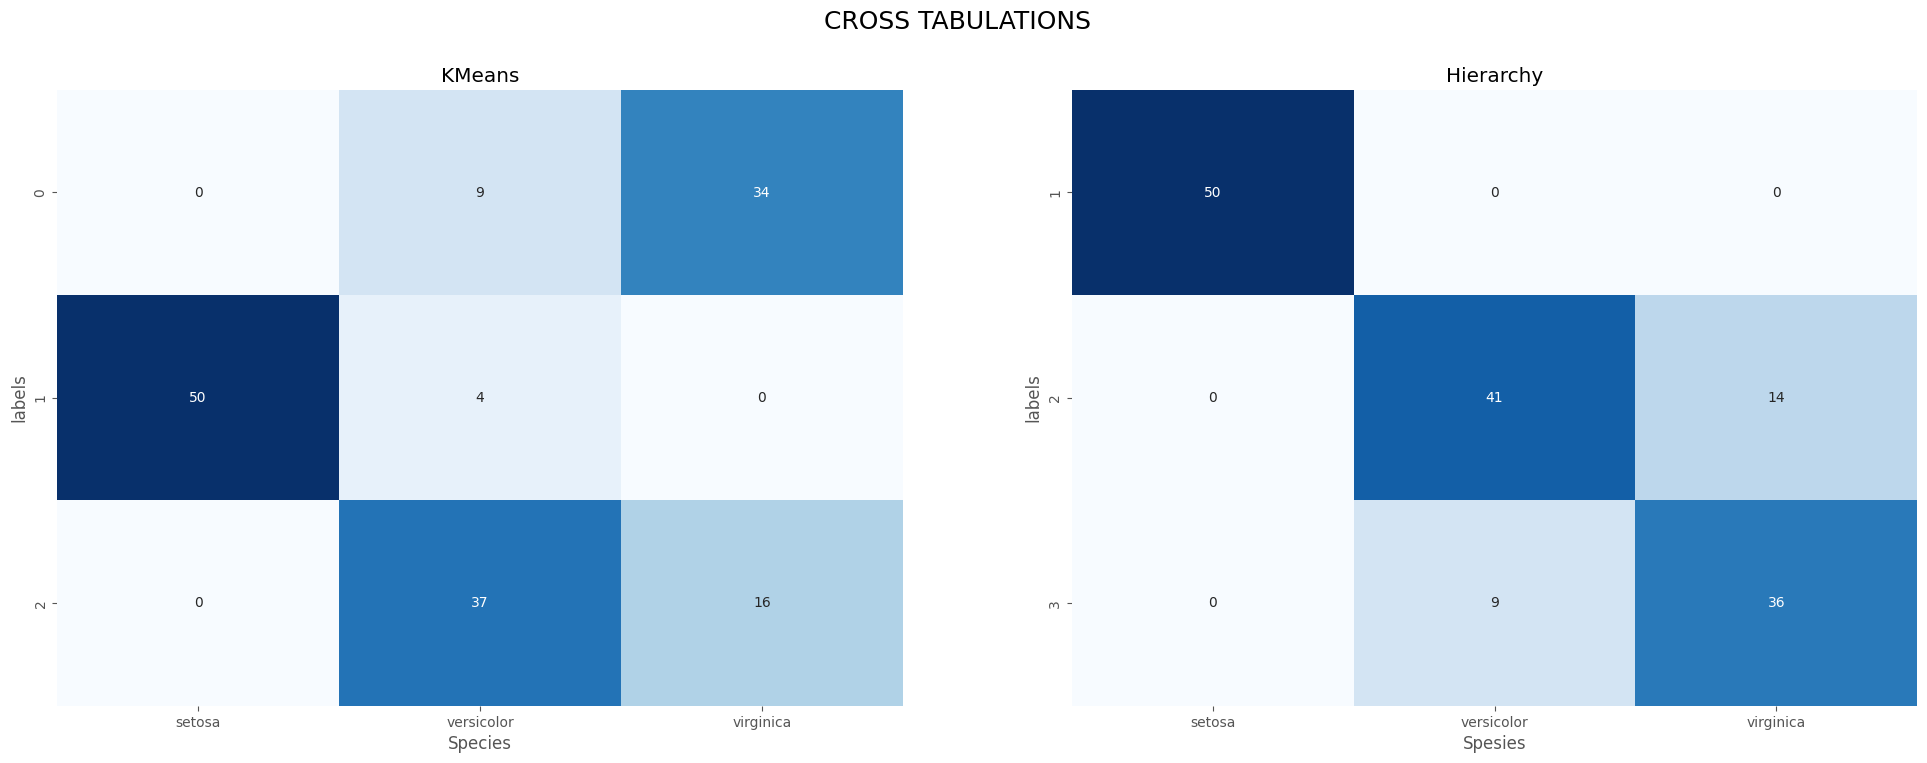

In [ ]:
plt.figure(figsize=(24,8))

plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()

# PCA (Principal Component Analysis)

Secara singkat, PCA adalah sebuah metode bagaimana mereduksi dimensi dengan menggunakan beberapa garis/bidang yang disebut dengan principle components (PCs). Diharapkan dengan menggunakan beberapa PC, bisa memudahkan kita untuk menginterpretasikan datanya dan melihat pembagian data ke dalam beberapa cluster (namun pembagian cluster bukan tujuan utama).

In [ ]:
#Import library
from sklearn.decomposition import PCA

In [ ]:
df2= df.drop('species',axis=1)
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# buat objek PCA: model 
pca = PCA(n_components=2)

#Latih dan Transform
pca_sample = pca.fit_transform(df2)


ps = pd.DataFrame(pca_sample)
ps.head()

,0,1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


### Clustering dengan Algoritma K-means
Lakukan clustering dengan dataframe yang dimensinya telah direduksi menggunakan PCA

In [ ]:
from sklearn.cluster import KMeans

#Buat objek dari k means dengan jumlah cluster : 3
model = KMeans(n_clusters=3)

# Lakukan fit terhadap model
model.fit(ps)
# Tentukan label untuk cluster
labels = model.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


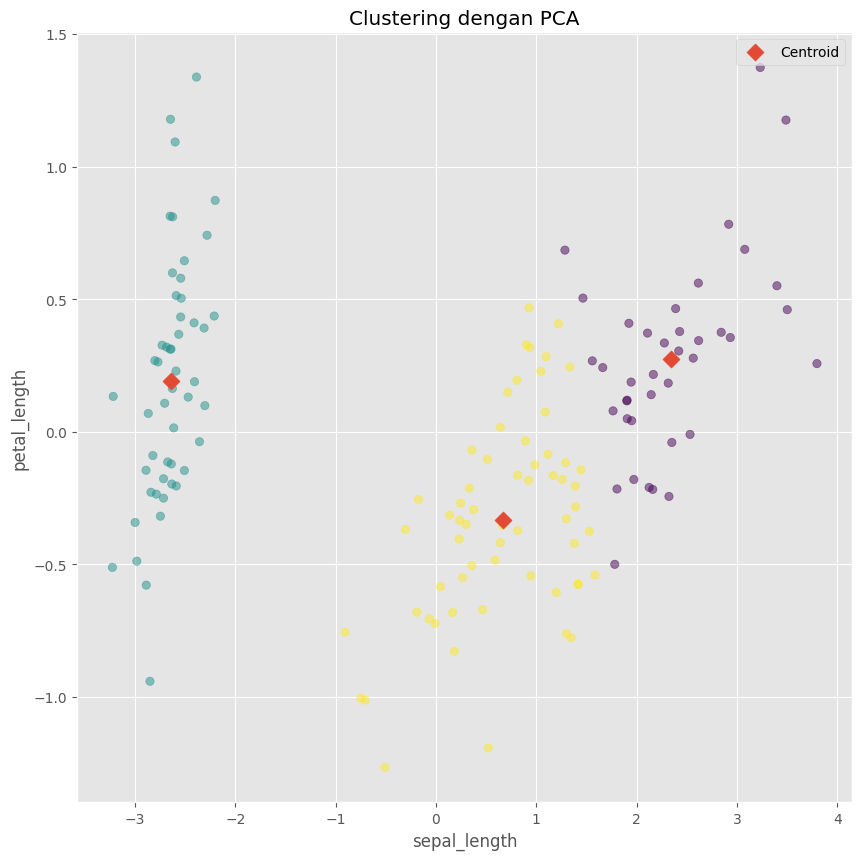

In [ ]:
# import visualisasi
import matplotlib.pyplot as plt

#Gunakan 'style' ggplot
plt.style.use('ggplot')


# mengambil semua baris pada kolom tertentu (dalam bentuk array)
xs = ps[0]
ys = ps[1]

# Menampung koordinat dari tiap centroid
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# visualisasi cluster
plt.figure(figsize=(10,10))

#Data point
plt.scatter(xs,ys,
            alpha=0.5,c=labels)

#Centroid point
plt.scatter(centroids_x,centroids_y,
            marker="D",s=75,label="Centroid")

plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.title("Clustering dengan PCA")
plt.legend()
plt.show()